# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

Best hyperparameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'uniform', 'select__k': 4}
Accuracy score: 0.45059523809523816

Selected Features:
course_ML: 0.00021307021097858312
course_statistics: 0.6124055806753081
course_databases: 0.0027408229370954793
stress_level: 0.002329675257964337
Test set accuracy: 0.39344262295081966
Test set F1 score: 0.10915750915750916

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0]
 [ 0  8  0  8  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0 14  0 16  0  0  0  0]
 [ 0  1  0  3  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


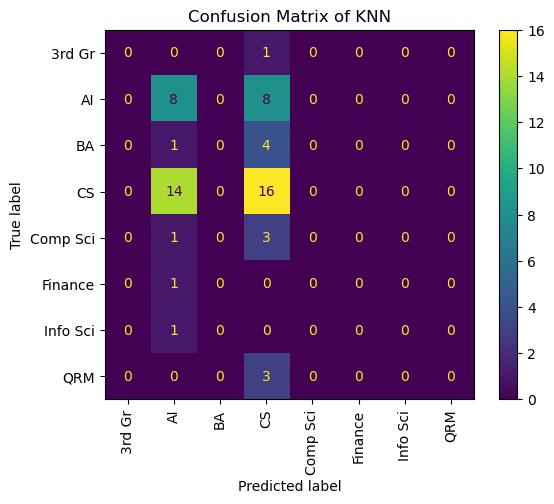

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'knn__n_neighbors': range(1, 31),  # number of neighbors to include in the majority of the voting process
    'knn__weights': ['uniform', 'distance'],  # weight function to use in prediction
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm to use for nearest neighbors search
    'knn__p': [1, 2],  # power parameter for Minkowski metric
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the KNN model
pipeline = Pipeline([
    ('select', SelectKBest(f_classif)),
    ('knn', KNeighborsClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = data.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of KNN")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Best hyperparameters: {'select__k': 4, 'tree__criterion': 'gini', 'tree__max_depth': 5, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 9, 'tree__splitter': 'random'}
Accuracy score: 0.4262755102040817

Selected Features:
course_ML: 0.00021307021097858312
course_statistics: 0.6124055806753081
course_databases: 0.0027408229370954793
stress_level: 0.002329675257964337
Test set accuracy: 0.39344262295081966
Test set F1 score: 0.35356705931699817

Confusion Matrix:
[[ 0  1  0  0  0  0  0  0]
 [ 0  4  3  9  0  0  0  0]
 [ 0  3  0  2  0  0  0  0]
 [ 0  8  2 20  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


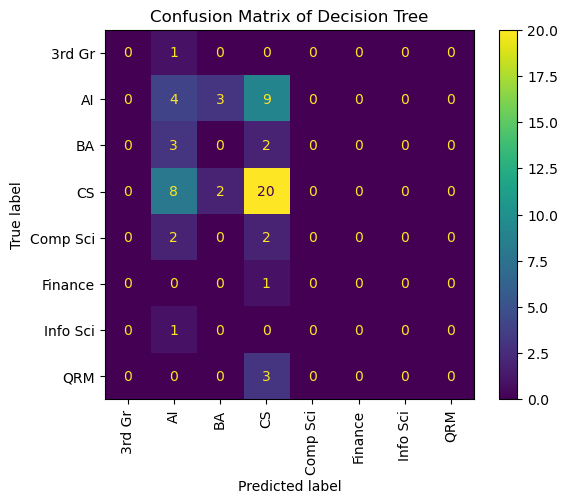

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Check for missing values
# print(iris.isnull().sum())

# Drop missing values
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['programme']
iris = iris.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': range(1, 10),
    'tree__min_samples_split': range(2, 10),
    'tree__min_samples_leaf': range(1, 5),
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Decision Tree model
pipeline = Pipeline([
    ('select', SelectKBest(f_classif)),
    ('tree', DecisionTreeClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = iris.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")


# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # calculate the weighted F1 score
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of Decision Tree")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
